In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Linear Algebra Lab Solutions

This guide focuses on solutions found using Python Jupyter Notebook.

## Linear Systems Solutions

1. Put $A$ into RREF.

$$
A = 
\begin{bmatrix}
1 & 1 & 1 & 2\\
2 & 3 & 1 & 3\\
1 & -1 & -2 & -11\\
\end{bmatrix}
$$

**Solution:**

In [42]:
# Let's set up the matrix and row operation functions
A = np.array([[1,1,1,2],[2,3,1,3],[1,-1,-2,-11]])

# Swap two rows
def swap(matrix, row1, row2):
    copy_matrix=np.copy(matrix).astype('float64') 
    copy_matrix[row1,:] = matrix[row2,:]
    copy_matrix[row2,:] = matrix[row1,:]
    return copy_matrix

# Multiple all entries in a row by a nonzero number
def scale(matrix, row, scalar):
    copy_matrix=np.copy(matrix).astype('float64') 
    copy_matrix[row,:] = scalar*matrix[row,:]  
    return copy_matrix

# Replacing a row by the sum of itself and a multiple of another 
def replace(matrix, row1, row2, scalar):
    copy_matrix=np.copy(matrix).astype('float64')
    copy_matrix[row1] = matrix[row1]+ scalar * matrix[row2] 
    return copy_matrix

In [43]:
A1 = replace(A, 1, 0, -2)
A2 = replace(A1, 2, 0, -1)
A3 = replace(A2, 2, 1, 2)
A4 = scale(A3, 2, -1/5)
A5 = replace(A4, 1, 2, 1)
A6 = replace(A5, 0, 1, -1)
A7 = replace(A6, 0, 2, -1)
A7

array([[ 1.,  0.,  0., -3.],
       [ 0.,  1.,  0.,  2.],
       [-0., -0.,  1.,  3.]])

A7 is in RREF.

2. Find the solution set of the following system of equations

$$
x - y + 3z = 0
$$

$$
6x - y + 4z = 1
$$

$$
3x + 2y - 4z = 2
$$

**Solution:**

We can change the system of equations into augmented matrix $B$, and put it into RREF to solve. 

In [44]:
B = np.array([[1,-1,3,0],[6,-1,4,1],[3,2,-4,2]])

B1 = replace(B, 1, 2, -2)
B2 = replace(B1, 2, 0, -3)
B3 = swap(B2, 1, 2)
B4 = replace(B3, 2, 1, 1)
B5 = replace(B4, 1, 2, 1)
B6 = scale(B5, 2, -1)
B7 = replace(B6, 1, 2, 14)
B8 = scale(B7, 1, 1/5)
B9 = replace(B8, 0, 1, 1)
B10 = replace(B9, 0, 2, -3)
B10

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  3.],
       [-0., -0.,  1.,  1.]])

B10 is in reduced echelon form, and gives us the solutions $x = 0$, $y = 3$ and $z = 1$.

3. Determine if the following vectors form a linearly independent or a linearly dependent set:

    a.

$$
\vec{v_1} = 
\begin{bmatrix} 
1\\2\\0\\
\end{bmatrix} + \begin{bmatrix} 
3\\1\\5\\
\end{bmatrix} + \begin{bmatrix} 
4\\2\\3\\
\end{bmatrix}
$$

    b.

$$
\vec{v_2} = 
\begin{bmatrix} 
1\\-4\\-2\\0\\
\end{bmatrix} + \begin{bmatrix} 
-3\\12\\-6\\0\\
\end{bmatrix}
$$

**Solution:**

a. A set of vectors form a linearly independent set if a matrix ($C$) made up of the vectors has only the trivial solution. Let's find out the type of solution:

In [45]:
C = np.array([[1,3,4,0],[2,1,2,0],[0,5,3,0]])
C

array([[1, 3, 4, 0],
       [2, 1, 2, 0],
       [0, 5, 3, 0]])

In [46]:
C1 = replace(C, 1, 0, -2)
C1

array([[ 1.,  3.,  4.,  0.],
       [ 0., -5., -6.,  0.],
       [ 0.,  5.,  3.,  0.]])

In [47]:
C2 = replace(C1, 2, 1, 1)
C2

array([[ 1.,  3.,  4.,  0.],
       [ 0., -5., -6.,  0.],
       [ 0.,  0., -3.,  0.]])

C2 gives us $-3 = 0$, which is impossible and means the only solution is the trivial solution. The set of vectors is linearly independent.

b. By theorem 3, a set of 2 vectors is linearly dependent if and only if one is a multiple of another. The second vector is a multiple of the first by a factor of $-3$, meaning the set of vectors is linearly dependent.

4. Write the general solution of the linear system corresponding to the augmented matrix $D$.

$$
D = \begin{bmatrix}
2 & 3 & 0 & 1\\
2 & 4 & 2 & 2\\
1 & 2 & 1 & 1\\
\end{bmatrix}
$$

**Solution:**

In [48]:
D = np.array([[2,3,0,1],[1,2,1,1],[2,4,2,2]])
D1 = replace(D, 0, 1, -1)
D1

array([[ 1.,  1., -1.,  0.],
       [ 1.,  2.,  1.,  1.],
       [ 2.,  4.,  2.,  2.]])

In [49]:
D2 = replace(D1, 2, 1, -2)
D2

array([[ 1.,  1., -1.,  0.],
       [ 1.,  2.,  1.,  1.],
       [ 0.,  0.,  0.,  0.]])

In [50]:
D3 = replace(D2, 1, 0, -1)
D3

array([[ 1.,  1., -1.,  0.],
       [ 0.,  1.,  2.,  1.],
       [ 0.,  0.,  0.,  0.]])

In [51]:
D4 = replace(D3, 0, 1, -1)
D4

array([[ 1.,  0., -3., -1.],
       [ 0.,  1.,  2.,  1.],
       [ 0.,  0.,  0.,  0.]])

Since we are left with an empty row, we see that for any $y \in \mathbb{R}$
 we have a unique solution. A general solution for this system is:

$$
\begin{bmatrix} x\\ y\\ z\\ \end{bmatrix} = \begin{bmatrix} {\frac{1}{2}-\frac{3}{2}y}\\ {y}\\ {\frac{1}{2}-\frac{y}{2}}\\ \end{bmatrix} = \begin{bmatrix} {\frac{1}{2}}\\ 0\\ {\frac{1}{2}}\\ \end{bmatrix} + \begin{bmatrix} {-\frac{3}{2}y}\\ {y}\\ {-\frac{y}{2}}\\ \end{bmatrix} = \begin{bmatrix} {\frac{1}{2}}\\ 0\\ {\frac{1}{2}}\\ \end{bmatrix} + y\begin{bmatrix} {-\frac{3}{2}}\\ {1}\\ {-\frac{1}{2}}\\ \end{bmatrix}
$$

## Matrices and Determinants Solutions

1. Let $A = \begin{bmatrix} 3 & 5\\ 0 & 2\\ 1 & 1\\ \end{bmatrix}$, $B = \begin{bmatrix} 2 & 2\\ 2 & 4\\\end{bmatrix}$ and $C = \begin{bmatrix}
1 & 0 & 7\\ 0 & 6 & 0\\ 0 & 4 & 3\\ 2 & 0 & 1\\
\end{bmatrix}$. Find the following matrices, if they exist:

    a. $CAB$

    b. $AB$

    c. $BCA$

    d. $B^2$

    e. $A^2$

    f. $B^{-1}$

    g. $C^{-1}$

    h. $A^{t} C^{t}$

**Solution:**

In [52]:
#First, set up arrays
A = np.array([[3,5],[0,2],[1,1]])
B = np.array([[2,2],[2,4]])
C = np.array([[1,0,7],[0,6,0],[0,4,3],[2,0,1]])

In [53]:
# a.
CAB = C @ A @ B
CAB

array([[44, 68],
       [24, 48],
       [28, 50],
       [36, 58]])

In [54]:
# b.
AB = A @ B
AB

array([[16, 26],
       [ 4,  8],
       [ 4,  6]])

In [55]:
# c. BCA is not possible, as B does not have the same amount of columns as C has rows.
BCA = B @ C @ A

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)

In [56]:
# d. B^2 is the same as BB
BB = B @ B
BB

array([[ 8, 12],
       [12, 20]])

In [57]:
# e. A^2 is not possible, as A is not a square matrix.
AA = A @ A
AA

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [58]:
# f. First, define an inverse method:

# Compute the inverse
def inverse_matrix(matrix):
    a, b = matrix[0]
    c, d = matrix[1]
    det = a * d - b * c
    if det == 0:
        print(matrix, "is not invertible")
    elif matrix.shape[0] != matrix.shape[1]:
        print(matrix, "is not invertible as it is not a square matrix")
    else:
        D = 1 / det    
        inverse = np.zeros((2, 2))
        inverse[0, 0] = D * d
        inverse[0, 1] = -D * b
        inverse[1, 0] = -D * c
        inverse[1, 1] = D * a
        return(inverse)

inverseOfB = inverse_matrix(B)
inverseOfB

array([[ 1. , -0.5],
       [-0.5,  0.5]])

In [60]:
# g. A is not invertible, as it is not a square matrix.

inverseOfA = inverse_matrix(A)
inverseOf

[[3 5]
 [0 2]
 [1 1]] is not invertible as it is not a square matrix


NameError: name 'inverseOf' is not defined

In [61]:
# h.
AtCt = A.T @ C.T
AtCt

array([[10,  0,  3,  7],
       [12, 12, 11, 11]])

2. Find the determinant and then the inverse of $A = \begin{bmatrix} 7 & 6 & {54}\\ 0 & 3 & 6\\ 0 & 0 & 1\\ \end{bmatrix}$. Prove $det(A^{-1}) = \frac{1}{det(A)}$.
   
**Solution:**

In [62]:
#First, define the matrix A and a method for finding the determinants of 3x3 matrices:
A = np.array([[7,6,54],[0,3,6],[0,0,1]])

# Computes a 2x2 determinant
def det2(matrix):
    
    if matrix.shape == (2, 2):
        return matrix[0,0] * matrix[1,1] - matrix[0,1] * matrix[1,0]
    else:
        print("Please enter a 2x2 matrix")
# Computes the 3x3 determinant over a given row
def det3(matrix, row):
    if matrix.shape == (3, 3) and row in range(3):
        det = 0
        for j in range(3):
            submatrix = np.delete( (np.delete(matrix, row , 0)), j ,1)   
            det += (-1) ** (row + j) * matrix[row, j] * det2(submatrix)
        return det
    else:
        print("The input matrix is not 3x3 or the row is not chosen in the right range")

#Calculate the determinant of A
detA = det3(A,2)
detA

21

In [63]:
#Calculate the inverse of A using numpy
invA = np.linalg.inv(A)
invA

array([[ 0.14285714, -0.28571429, -6.        ],
       [ 0.        ,  0.33333333, -2.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [64]:
#Calculate the determinant of the inverse of A
detInvA = det3(invA,0)
detInvA

0.047619047619047616

In [65]:
#Finally, we can use a simple boolean to prove det(A^-1) = 1/det(A)
inverseCheck = (detInvA == 1/detA)
print('Is the determinant of the inverse equal to the inverse of the determinant of A?:', inverseCheck)

Is the determinant of the inverse equal to the inverse of the determinant of A?: True


3. Find the volume of the parallelepiped formed by vectors $\begin{bmatrix} 1\\3\\0\\ \end{bmatrix}$, $\begin{bmatrix} 0\\2\\5\\ \end{bmatrix}$ and $\begin{bmatrix} 5\\2\\4\\ \end{bmatrix}$. Are the points at the tips of the vector coplanar? Explain.
   
**Solution:**

In [75]:
# We can form a matrix P out of the vectors in which we can find the determinant. The determinant is equal to the volume.
P = np.array([[1,0,5],[3,2,2],[0,5,4]])

volume = det3(P,2) #the 'det3' function was defined in question 2 
print ('volume =', volume) 

volume = 73


The vector tips cannot be coplanar, as the determinant is not equal to zero. Conceptually, if there is a volume above zero, then the vectors could not lie on the same plane.

## Linear Transformations Solutions

1. Determine if the following transformations are linear. Explain why or why not.

    a. $T1(\begin{bmatrix} x\\ y\\ z\\ \end{bmatrix}) = \begin{bmatrix} x - 3y - z\\ 3x + 2y - 7z\\ \end{bmatrix}$

    b. $T2(\begin{bmatrix} x\\ y\\ z\\ \end{bmatrix}) = \begin{bmatrix} x + y + z\\ 5z\\ x + 2\\ \end{bmatrix}$

    c. $T3(\begin{bmatrix} x\\ y\\ \end{bmatrix}) = \begin{bmatrix} x\\ x + y\\ y\end{bmatrix}$
   
**Solution:**

For each transformation, we will check the two conditions of a linear transformation:

1. $T(\vec{0}) = \vec{0}$
2. $T(c\vec{u} + d\vec{v}) = cT(\vec{u}) + dT(\vec{v}) \quad \forall \vec{u}, \vec{v} \in \mathbb{R}^m \quad \text{and}\quad  \forall c\in \mathbb{R}$

These conditions can be checked using Python functions.

In [76]:
#a

# transformation function for T1
def T1(V):
    W = np.zeros((2,1)) #returns the zero vector in R^2
    W[0,0] = V[0,0] - 3*V[1,0] - V[2,0]   #builds first component
    W[1,0] = 3*V[0,0] + 2*V[1,0] - 7*V[2,0]   #builds second component
    return W
    
Z = np.zeros((3,1))

T1(Z)

array([[0.],
       [0.]])

In [77]:
# The first condition is fulfilled, and we can test the second.

c = 2
d = 4
u = np.array([[-1],[5],[3]])
v = np.array([[3],[-8],[6]])

T1(c * u + d * v)

array([[  46.],
       [-224.]])

In [78]:
c * T1(u) + d * T1(v)

array([[  46.],
       [-224.]])

Both conditions are true, so transformation T1 is linear.

**Important Note:** Normally, the surefire way to prove the second condition would be with arbitrary values. However, due to how Python works we need to use literal values instead of arbitrary values. This will not be mentioned in further examples, but we can for sure prove $T1(c\vec{u} + d\vec{v}) = cT1(\vec{u}) + dT1(\vec{v})$ with the following proof:

Suppose $\vec{u} = \begin{bmatrix} x\\ y\\ z\\ \end{bmatrix}, \vec{v} = \begin{bmatrix} e\\ f\\ g\\ \end{bmatrix} \text{and} \quad c, d, x, y, z, e, f, g \in \mathbb{R}$

$$
T1(c\begin{bmatrix} x\\ y\\ z\\ \end{bmatrix} + d\begin{bmatrix} e\\ f\\ g\\ \end{bmatrix}) = T(\begin{bmatrix} cx\\ cy\\ cz\\ \end{bmatrix} + \begin{bmatrix} de\\ df\\ dg\\ \end{bmatrix}) = T(\begin{bmatrix} cx + de\\ cy + df\\ cz + dg\\ \end{bmatrix} = \begin{bmatrix} {cx + de - 3(cy + df) - (cz + dg)}\\ {3(cx + de) + 2(cy + df) - 7(cz + dg)}\\ \end{bmatrix}
$$

$$
cT1(\begin{bmatrix} x\\ y\\ z\\ \end{bmatrix}) + dT1(\begin{bmatrix} e\\ f\\ g\\ \end{bmatrix}) = c\begin{bmatrix} x - 3y - z\\ 3x + 2y - 7z\\ \end{bmatrix} + d\begin{bmatrix} e - 3f - g\\ 3e + 2f - 7g\\ \end{bmatrix} = \begin{bmatrix} cx - c3y - cz\\ c3x + c2y - c7z\\ \end{bmatrix} + \begin{bmatrix} de - d3f - dg\\ d3e + d2f - d7g\\ \end{bmatrix} = \begin{bmatrix} {cx + de - 3(cy + df) - (cz + dg)}\\ {3(cx + de) + 2(cy + df) - 7(cz + dg)}\\ \end{bmatrix}
$$

Therefore, $T1(c\vec{u} + d\vec{v}) = cT1(\vec{u}) + dT1(\vec{v})$.


In [79]:
# b

# transformation function for T2
def T2(V):
    W = np.zeros((3,1)) #returns the zero vector in R^3
    W[0,0] = V[0,0] + V[1,0] + V[2,0]   #builds first component
    W[1,0] = 5*V[2,0]   #builds second component
    W[1,0] = V[0,0] + 2   #builds third component
    return W

Z = np.zeros((3,1))

T2(Z)

array([[0.],
       [2.],
       [0.]])

The first condition is not upheld, so T2 cannot be a linear transformation.

In [80]:
# c

# transformation function for T3
def T3(V):
    W = np.zeros((3,1)) #returns the zero vector in R^3
    W[0,0] = V[0,0]   #builds first component
    W[1,0] = V[0,0] + V[1,0]   #builds second component
    W[2,0] = V[1,0]   #builds third component
    return W

Z = np.zeros((2,1))

T3(Z)

array([[0.],
       [0.],
       [0.]])

In [81]:
# The first condition is fulfilled, and we can test the second.

c = 3
d = 5
u = np.array([[-2],[11]])
v = np.array([[5],[-3]])

T3(c * u + d * v)

array([[19.],
       [37.],
       [18.]])

In [82]:
c * T3(u) + d * T3(v)

array([[19.],
       [37.],
       [18.]])

Both conditions are upheld for T3, meaning it is a linear transformation.

T1 and T3 are linear transformations, while T2 is not.

2. Find standard matrices for any linear transformations found in problem 1, if they exist.

**Solution:**

a. Standard matrix for T1: $A = \begin{bmatrix} 1 & -3 & -1\\ 3 & 2 & -7\\ \end{bmatrix}$

b. T2 is not a linear transformation, so there can be no standard matrix.

c. Standard matrix for T3: $A = \begin{bmatrix} 1 & 0\\ 1 & 1\\ 0 & 1\\ \end{bmatrix}$

We can prove these are the standard matrices by using Python:

In [83]:
# define the standard matrices
STD_T1 = np.array([[1, -3, -1],[3, 2, -7]])
STD_T3 = np.array([[1, 0],[1, 1],[0, 1]])

# define some test vectors to transform
U_T1 = np.array([[2],[-5],[4]])
U_T3 = np.array([[-3],[6]])

# store the vectors transformed by their respective functions
func_T1_test = T1(U_T1)
func_T3_test = T3(U_T3)

# store the vectors transformed by their respective standard matrices
STD_T1_test = STD_T1 @ U_T1
STD_T3_test = STD_T3 @ U_T3

# print the results using booleans to confirm the standard matrices are correct
print('STD_1 is the standard matrix for T1 = ', STD_T1_test == func_T1_test)
print('STD_1 is the standard matrix for T1 = ', STD_T3_test == func_T3_test)

STD_1 is the standard matrix for T1 =  [[ True]
 [ True]]
STD_1 is the standard matrix for T1 =  [[ True]
 [ True]
 [ True]]


Both standard matrices are correct.

3. Verify the Rank-Nullity Theorem for standard matrices found in problem 2, if they exist.
   
**Solution:**

From the Rank-Nullity theorem, we know $dim(col(A)) = $ the number of pivot columns in A and $dim(null(A)) = $ the number of non-pivot columns in A. To find these, we will need to put the standard matrices into RREF.

In [84]:
# a

STD_T1 = np.array([[1, -3, -1],[3, 2, -7]])
STD_T1_1 = replace(STD_T1, 1, 0, -3)
STD_T1_2 = scale(STD_T1_1, 1, 1/11)
STD_T1_3 = replace(STD_T1_2, 0, 1, 3)
STD_T1_3

array([[ 1.        ,  0.        , -2.09090909],
       [ 0.        ,  1.        , -0.36363636]])

Column 1 and 2 are pivots columns, while the third column is not. Therefore, $dim(col(A)) + dim(null(A)) = 2 + 1 = 3 = n$.

In [85]:
# c

STD_T3 = np.array([[1, 0],[1, 1],[0, 1]])
STD_T3_1 = replace(STD_T3, 1, 0, -1)
STD_T3_2 = replace(STD_T3_1, 2, 1, -1)
STD_T3_2

array([[1., 0.],
       [0., 1.],
       [0., 0.]])

Column 1 and 2 are pivots columns. Therefore, $dim(col(A)) + dim(null(A)) = 2 + 0 = 2 = n$.

## Eigenvalues and Eigenvectors Solutions

1. Find the eigenvalues of $A = \begin{bmatrix} 0 & 4 & 8\\ 0 & 3 & 0\\ 2 & 7 & 4\\ \end{bmatrix}$ and their multiplicities.

**Solution:**

In [86]:
#define the vector
A = np.array([[0,4,8], [0, 3, 0], [2,7,4]])

#eigenvalues of A
eigenvalues = np.linalg.eigvals(A)
eigenvalues

array([-2.47213595,  6.47213595,  3.        ])

The multiplicity of each eigenvalue is 1, as they only appear once in the array.

2. For each eigenvalue in part 1 find the corresponding eigenspace.
   
**Solution:**

$E_{-2.47213595} = Null(\begin{bmatrix} {0+2.47213595} & 4 & 8\\ 0 & {3+2.47213595} & 0\\ 2 & 7 & {4+2.47213595}\\ \end{bmatrix}) = Null(\begin{bmatrix} {2.47213595} & 4 & 8\\ 0 & {5.47213595} & 0\\ 2 & 7 & {6.47213595}\\ \end{bmatrix})$

$E_{6.47213595} = Null(\begin{bmatrix} {0-6.47213595} & 4 & 8\\ 0 & {3-6.47213595} & 0\\ 2 & 7 & {4-6.47213595}\\ \end{bmatrix}) = Null(\begin{bmatrix} {-6.47213595} & 4 & 8\\ 0 & {-3.47213595} & 0\\ 2 & 7 & {-2.47213595}\\ \end{bmatrix})$

$E_{3} = Null(\begin{bmatrix} {0-3} & 4 & 8\\ 0 & {3-3} & 0\\ 2 & 7 & {4-3}\\ \end{bmatrix}) = Null(\begin{bmatrix} {-3} & 4 & 8\\ 0 & {0} & 0\\ 2 & 7 & {1}\\ \end{bmatrix})$

3. Find the dimension of each eigenspace in part 2 by finding a basis for it.
   
**Solution:**

Basis for $E_{-2.47213595} :$ There is no basis, as the null space is just the zero vector.

Basis for $E_{6.47213595} :$ There is no basis, as the null space is just the zero vector.

Basis for $E_3: \left\{ \ \begin{bmatrix} {52/29} \\ {-19/29} \\ {1} \end{bmatrix}   \  \right\}
$

## Orthoganality Solutions

1. Check if $\vec{u}$ and $\vec{v}$ are orthogonal:

    a. $\vec{u} = \begin{bmatrix} 6\\ 2\\ 3\\ 1\\ \end{bmatrix}$ and $\vec{v} = \begin{bmatrix} 2\\ -12\\ 3\\ 3\\ \end{bmatrix}$

    b. $\vec{u} = \begin{bmatrix} 7\\ {-3}\\ {-2}\\ \end{bmatrix}$ and $\vec{v} = \begin{bmatrix} 2\\ 7\\ {-3}\\ \end{bmatrix}$
   
**Solution:**

In [87]:
# a
u = np.array([6, 2, 3, 1]) #In this case, we use standard arrays to conform to how np.dot is defined
v = np.array([2, -12, 3, 3])
uv = np.dot(u,v)
uv

0

The dot product of $\vec{u}$ and $\vec{v}$ is $0$, so $\vec{u}$ and $\vec{v}$ are orthogonal.

In [88]:
# b
u = np.array([7, -3, -2]) #In this case, we use standard arrays to conform to how np.dot is defined
v = np.array([2, 7, -3])
uv = np.dot(u,v)
uv

-1

The dot product of $\vec{u}$ and $\vec{v}$ is NOT $0$, so $\vec{u}$ and $\vec{v}$ are NOT orthogonal.

2. Suppose 

$\vec{y} = \begin{bmatrix} 7 \\ 9 \end{bmatrix}$ and $\vec{u} = \begin{bmatrix} -1 \\ -2 \end{bmatrix}.$

Compute the $\text{proj}_{\vec{u}}(\vec{y})$ and the component of $\vec{y}$ orthogonal to $\vec{u}$ 
   
**Solution:**

In [89]:
# setup vectors

y = np.array([7,9])

u = np.array([-1,-2])

# projection of y onto u

proj_y_u = (np.dot(y,u)/ np.dot(u,u))* u
print( "the projection of y onto u is ", proj_y_u) 

z = y - proj_y_u

print("the component of y orthogonal to u is", z )

the projection of y onto u is  [ 5. 10.]
the component of y orthogonal to u is [ 2. -1.]


Now we can plot $\text{proj}_{\vec{u}}(\vec{y})$ and the component of $y$ orthogonal to $u$ in the $xy$-plane.

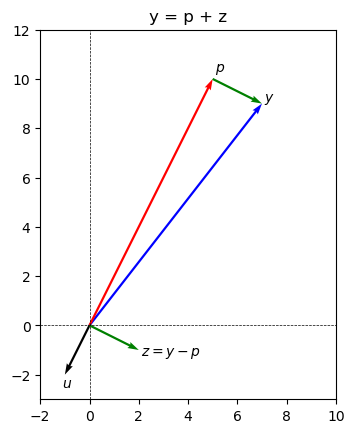

In [90]:
# Plot the coordinates in two separate plots
fig, ax = plt.subplots()

figsize=(20, 10)

# vector y
ax.quiver(0, 0, 7, 9, angles='xy', scale_units='xy', scale=1, color='blue', label ='y')
ax.text(7.1,9.1,'$y$')

# vector u
ax.quiver(0, 0, -1, -2, angles='xy', scale_units='xy', scale=1, color='black')
ax.text(-1.1,-2.5,'$u$')

# orthogonal projection p
ax.quiver(0, 0, 5, 10, angles='xy', scale_units='xy', scale=1, color='red')
ax.text(5.1,10.3,'$p$')

# vector z
ax.quiver(0, 0, 2, -1, angles='xy', scale_units='xy', scale=1, color='green')
ax.text(2.1,-1.2,'$z = y - p$')

# A copy of vector z starting at the end of vector p
ax.quiver(5, 10, 2, -1, angles='xy', scale_units='xy', scale=1, color='green')


ax.set_xlim([-2, 10])
ax.set_ylim([-3, 12])
ax.set_aspect('equal')
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.5)

ax.set_title('y = p + z')


plt.show()

3. Suppose 

$$
\vec{u} _1 = \begin{bmatrix} -2\\ 3\\ 7\\ -1\\ \end{bmatrix},
$$

$$
\vec{u}_2 = \begin{bmatrix} 2\\ -2\\ 0\\ 4\\ \end{bmatrix},
$$ 

$W = \text{span} (\vec{u}_1, \vec{u}_2)$ and 

$$
\vec{y} = \begin{bmatrix} 4 \\ 2 \\ 3 \\ 1\\ \end{bmatrix}.
$$

Compute the $\text{proj}_{W}(\vec{y})$ and the component of $\vec{y}$ orthogonal to $\vec{u}.$ 

**Solution:**

In [91]:
# setup vectors

u1 = np.array([-2,3,7,-1])

u2 = np.array([2,-2,0,4])

y = np.array([3,2,3,1])

# projection of y onto W

proj_y_W = (np.dot(y,u1)/ np.dot(u1,u1))* u1  +  (np.dot(y,u2)/ np.dot(u2,u2))* u2

print( "The projection of y onto W is ", proj_y_W, '\n') 

# component of y orthogonal to p
z = y - proj_y_W

print("The component of y orthogonal to u is", z )

The projection of y onto W is  [-0.13492063  0.45238095  2.22222222  0.68253968] 

The component of y orthogonal to u is [3.13492063 1.54761905 0.77777778 0.31746032]


4. Find a least-squares solution of the inconsistent system $A\vec{x} = \vec{b}$ for

   $$
   A = \begin{bmatrix} {1} & {2} & {4}\\ {1} & {-2} & {4}\\ \end{bmatrix} \text{ and } \vec{b} = \begin{bmatrix} 3\\ 4\\ \end{bmatrix}
   $$

**Solution:**

In [92]:
#First, set up a normal equation for Ax=b and find a solution for it

A = np.array([[1,2,4], [1,-2,4]])

b = np.array([[3], [4]])

# compute A^TA
ATA = A.transpose() @ A 

print("A^TA = \n", ATA)

# compute A^Tb
ATb = A.transpose() @ b 

print("\n A^Tb = \n", ATb)

A^TA = 
 [[ 2  0  8]
 [ 0  8  0]
 [ 8  0 32]]

 A^Tb = 
 [[ 7]
 [-2]
 [28]]


Thus, the normal equation is$$
\begin{bmatrix} {2} & {0} & {8}\\ {0} & {8} & {0}\\ {8} & {0} & {32}\\ \end{bmatrix} \begin{bmatrix} {x_1}\\ {x_2}\\ {x_3}\\ \end{bmatrix} = \begin{bmatrix} {7}\\ {-2}\\ {28}\\ \end{bmatrix}
$$ 
 
 
To solve this equation we form its augmented  and use row operationsmatrix:

In [93]:
#augmented 
M = np.concatenate((ATA, ATb), axis=1)
M

array([[ 2,  0,  8,  7],
       [ 0,  8,  0, -2],
       [ 8,  0, 32, 28]])

In [94]:
M1 = replace(M, 2, 0, -4)
M2 = scale(M1, 1, 1/8)
M3 = scale(M2, 0, 1/2)
M3

array([[ 1.  ,  0.  ,  4.  ,  3.5 ],
       [ 0.  ,  1.  ,  0.  , -0.25],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])

The general solution is $x_1 = \frac{7}{2}-4x_3$, $x_2 = -\frac{1}{4}$, and $x_3$ is a free parameter. The general least squares solution of $A\vec{x} = \vec{b}$ has the form:

$$
\hat{x} = \begin{bmatrix} {\frac{7}{2}} \\ {-\frac{1}{4}} \\ {0}\\ \end{bmatrix} + x_3\begin{bmatrix} {-4} \\ {0} \\ {1}\\ \end{bmatrix}
$$